In [49]:
print('hello world')
print('be productive')

hello world
be productive


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed('spearhead')

# Surpress SettingsWithCopyWarning Error
pd.options.mode.copy_on_write = True

In [51]:
ship_table = pd.read_csv('Ship_Performance_Dataset.csv')
# ship_table.head(2)

In [52]:
ship_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [53]:
# Better Approach
# ship_table.dropna(inplace=True)
# ship_table.reset_index(drop=True, inplace=True)
adjusted_ship_dataset = ship_table.dropna()
adjusted_ship_dataset = adjusted_ship_dataset.reset_index(drop=True)

# df.info()
# df.columns
# adjusted_ship_dataset.corr(method='pearson', numeric_only=True)

In [54]:
# feature to use
# 6 && 7 && 10

feature1 = 'Engine_Power_kW'
feature2 = 'Distance_Traveled_nm'
feature3 = 'Cargo_Weight_tons'

# n_centroid = np.array([np.nan for _ in range(adjusted_ship_dataset.shape[0])])

k_mean_df = adjusted_ship_dataset[[feature1, feature2, feature3]] 
# k_mean_df['n_centroid'] = np.nan

k_mean_df.tail()

Engine_Power_kW  Distance_Traveled_nm  Cargo_Weight_tons
2122      1813.474360            147.964296        1450.181358
2123      1662.426557           1175.942724         451.670997
2124      2918.395972            239.990359         318.111891
2125      2028.143572            619.236340         153.441965
2126      2928.588108           1930.235779         712.997894

In [55]:
# 3d graph using all three features
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
# ax.scatter(k_mean_df[feature1], k_mean_df[feature2], k_mean_df[feature3], marker='D', alpha=0.7)
# plt.show()

In [56]:
# fig, ax = plt.subplots(figsize=(3, 3))
# ax.scatter(k_mean_df[feature1], k_mean_df[feature2])
# ax.set_ylabel(feature2)
# ax.set_xlabel(feature1)
# plt.show()

In [57]:
# centroid = [k_mean_df[feature1].mean(), k_mean_df[feature2].mean()]
# # print(centroid1)
# # k = 1
# fig, ax = plt.subplots(figsize=(3, 3))
# ax.scatter(k_mean_df[feature1], k_mean_df[feature2])
# ax.scatter(centroid[0], centroid[1], color='red', marker='x') 
# ax.set_xlabel(feature1)
# ax.set_ylabel(feature2)
# plt.show()

In [58]:
def randompoint(feature):
  min = k_mean_df[feature].min()
  max = k_mean_df[feature].max()
  # print(min, max)
  return random.randint(min.astype(np.int64), max.astype(np.int64))

number_centroids = 5
centroids = np.array([[randompoint(feature1), randompoint(feature2)] for _ in range(number_centroids)])

print(centroids)

[[ 838 1535]
 [1612  487]
 [ 858 1152]
 [1445 1277]
 [1218 1409]]


In [59]:
# transposed_centroids = centroids.T
# print(transposed_centroids)

# # k = 3
# fig, ax = plt.subplots(figsize=(20, 20))
# ax.scatter(k_mean_df[feature1], k_mean_df[feature2], alpha=0.4)
# # ax.scatter(transposed_centroids[0], transposed_centroids[1], color='red', marker='x')

# ax.scatter(centroids[0][0], centroids[0][1], color='red', marker='x')
# ax.scatter(centroids[1][0], centroids[1][1], color='orange', marker='x')
# ax.scatter(centroids[2][0], centroids[2][1], color='yellow', marker='x')
# ax.scatter(centroids[3][0], centroids[3][1], color='orange', marker='x')
# ax.scatter(centroids[4][0], centroids[4][1], color='yellow', marker='x')

# ax.set_xlabel(feature1)
# ax.set_ylabel(feature2)
# plt.show()

In [60]:
# distances_centroids = [[newdf[feature1][x], newdf[feature2][x]] for x in range(newdf.shape[0])]
# distances_centroids = [[newdf.iloc[x][feature1], newdf.iloc[x][feature2]] for x in range(newdf.shape[0])]
# distances_centroids = np.array([[math.dist([newdf.iloc[x][feature1], newdf.iloc[x][feature2]], [centroids[y][0], centroids[y][1]]) for y in range(len(centroids))] for x in range(newdf.shape[0])])
# distances_centroids = [x for x in range(len(newdf))]

distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])
print(distances_centroids)

[[1069.12917084  602.29873214  942.51071941  412.45539798  674.99045685]
 [1193.56552153  175.71884534  931.74727325  650.78022213  864.90916185]
 [ 415.42537339  945.94766368   62.55252751  550.61405877  413.85329714]
 ...
 [2450.5300184  1329.5428531  2253.21839751 1801.74490044 2063.47522467]
 [1501.6873188   436.64851117 1285.71890279  879.03894011 1131.39703299]
 [2127.62072736 1953.54389752 2212.00950304 1621.03382372 1788.23891394]]


In [61]:
# old solution but does not have centroid information
# sorted_distances_centroids = np.array([x[:1] for x in distances_centroids])

# distances_centroids = distances_centroids.where(distances_centroids.eq(distances_centroids.min(axis=1), axis=0))
# distances_centroids.head()

index_centroids = np.array([x.argmin() for x in distances_centroids])
# print(index_centroids)
k_mean_df['nearest_centroids'] = index_centroids 

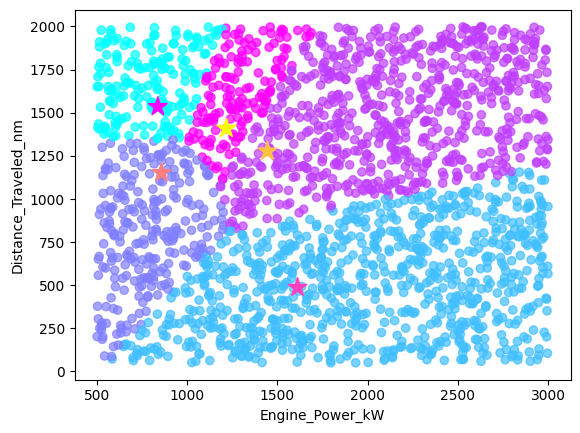

In [62]:
# print(centroids)

# BETTER SOLUTION
# fig, ax = plt.subplots(figsize=(8, 8))
fig, ax = plt.subplots()

# Datasets
ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)

# Centroids
centroid_x = centroids[:, 0]
centroid_y = centroids[:, 1]
colors = ['black', 'green', 'blue']
plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)


# plt.colorbar(ax)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [63]:
# NEW Centroids
new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])
terminate = centroids.sum()

0


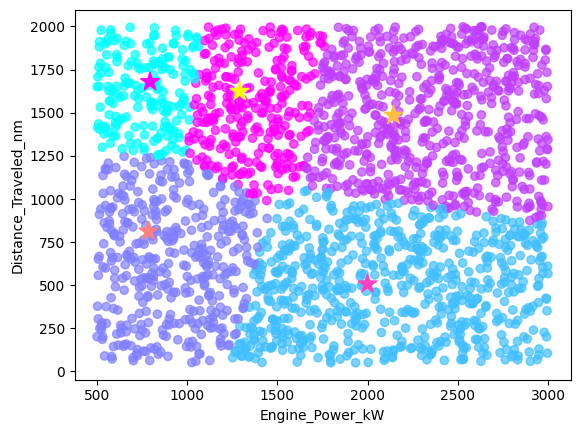

1


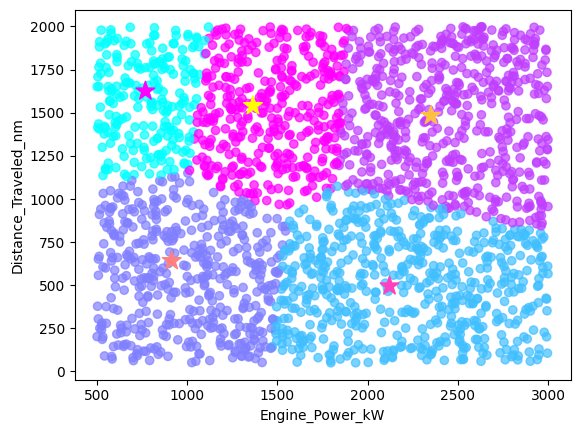

2


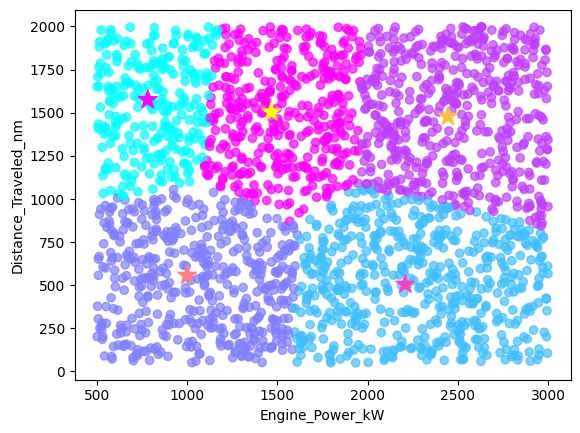

3


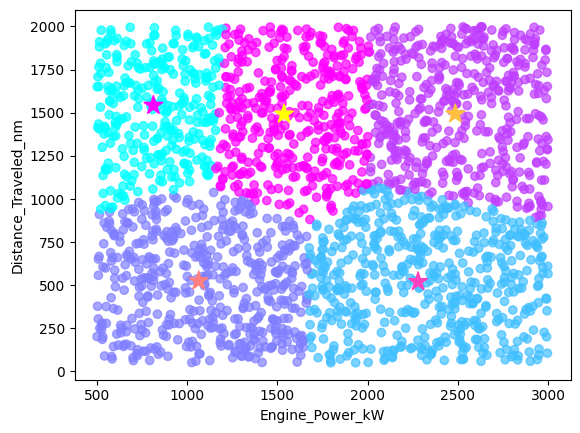

4


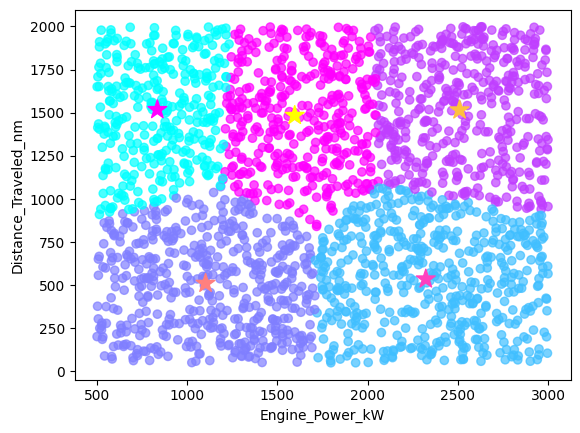

5


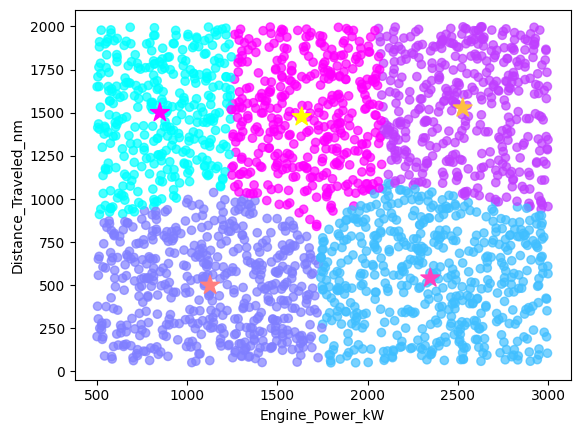

6


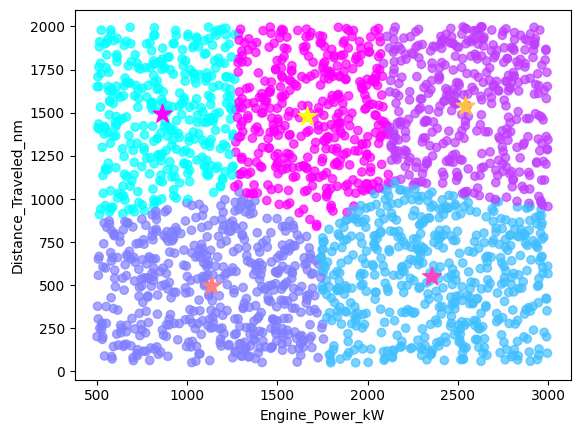

7


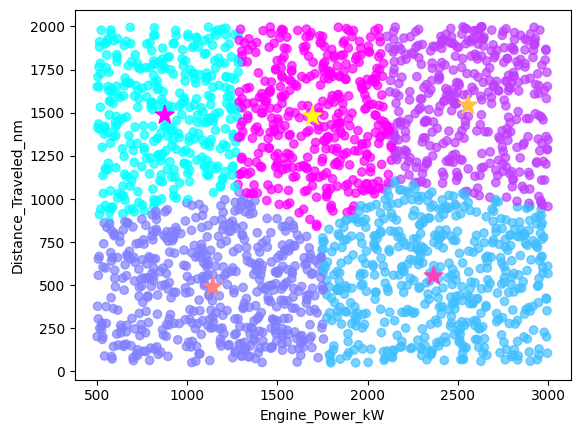

8


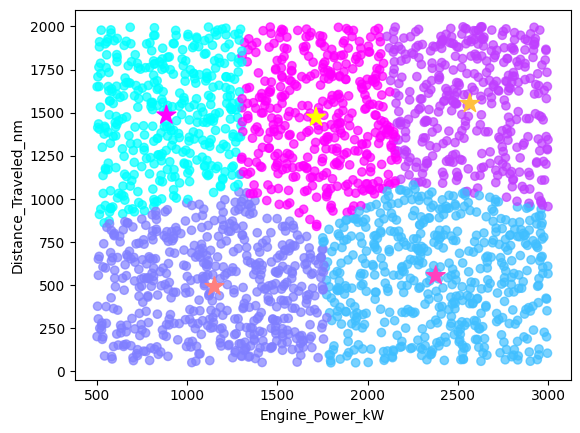

9


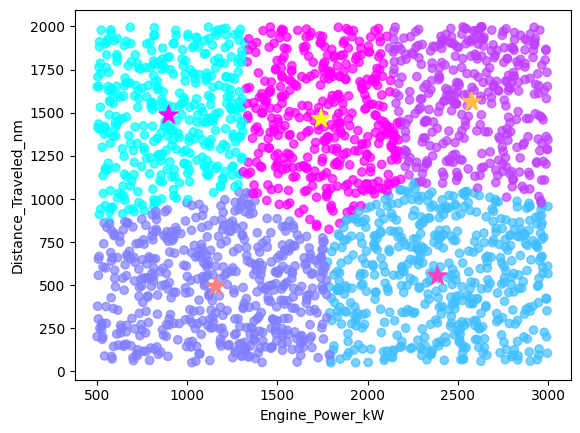

10


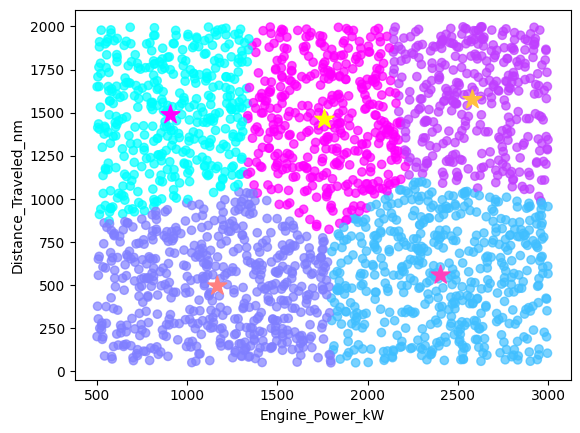

11


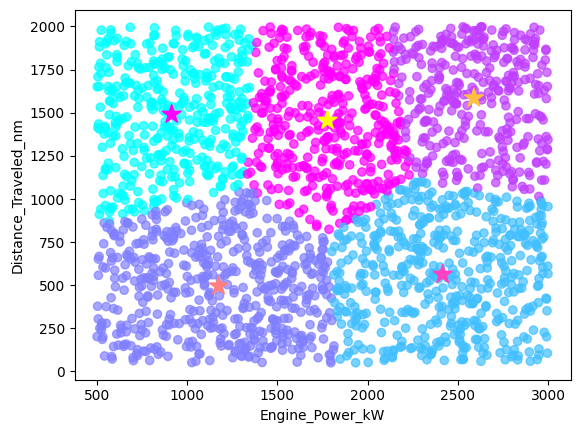

12


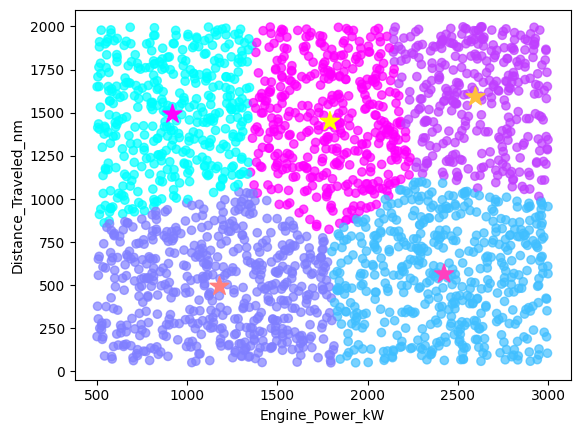

13


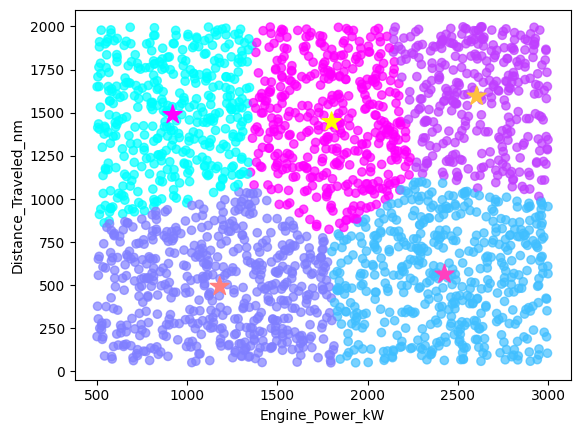

14


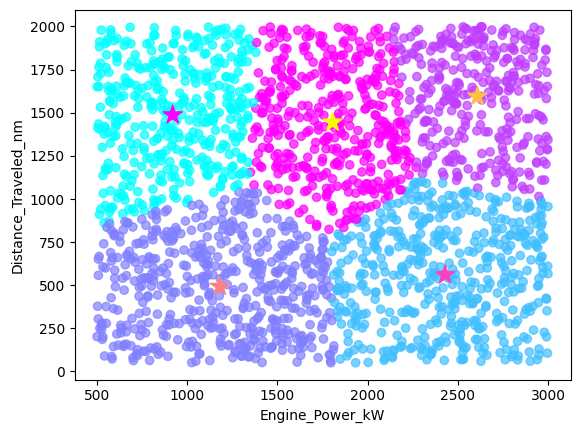

15


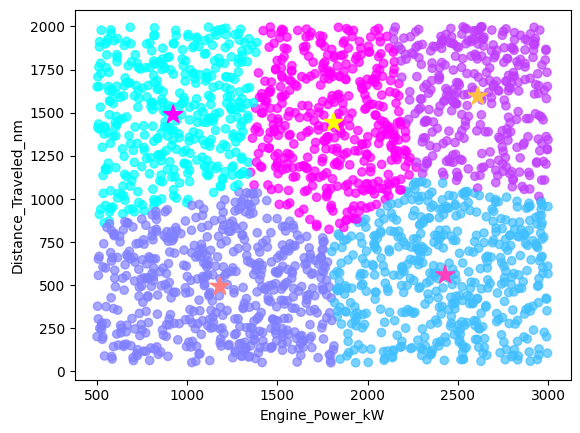

16


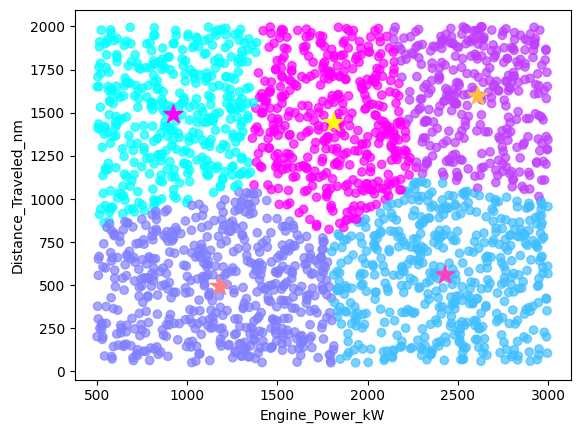

17


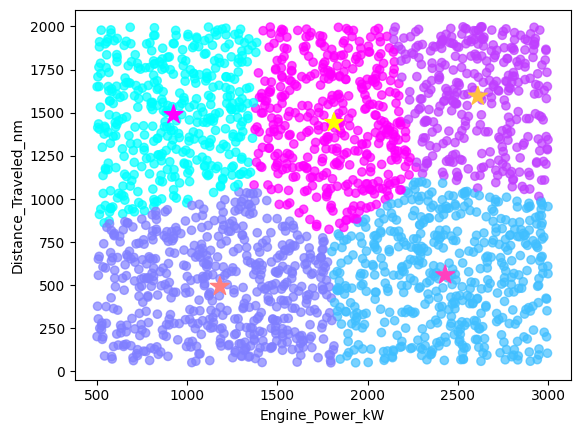

18


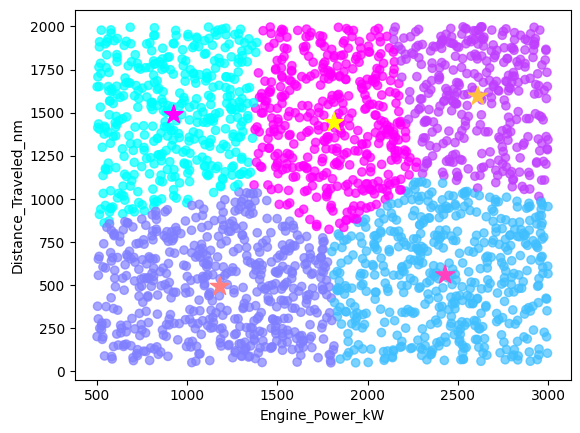

19


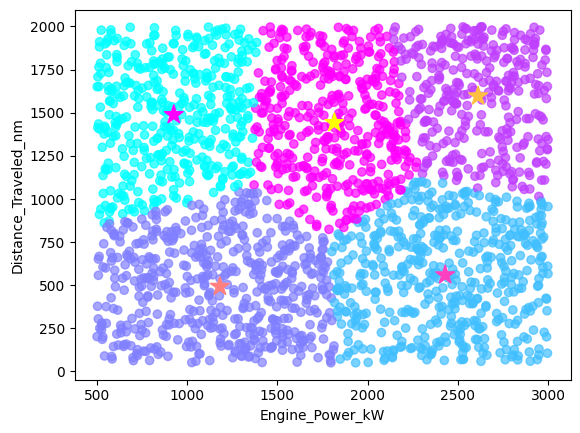

In [64]:
# termination criterion

itr = 0
while (True):
  print(itr)

  distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])
  index_centroids = np.array([x.argmin() for x in distances_centroids])
  k_mean_df['nearest_centroids'] = index_centroids 

  # fig, ax = plt.subplots(figsize=(2,2))
  fig, ax = plt.subplots()
  # Datasets
  ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)
  # Centroids
  centroid_x = centroids[:, 0]
  centroid_y = centroids[:, 1]
  plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)

  ax.set_xlabel(feature1)
  ax.set_ylabel(feature2)
  plt.show()

  new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
  # print(new_centroids)
  centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])
  # print(centroids)

  itr+=1
  if (math.floor(terminate) == math.floor(centroids.sum())):
    break

  terminate = centroids.sum()